In [1]:
#import os
#os.chdir('..')
# Read data into papers
import pandas as pd

# Define Data

data = pd.read_csv('go_sample.csv')
# Print head
data.head()

,review
0,his inquiry based class was the best college c...
1,hes a really awesome teacher! he is really hel...
2,amazing teacher very helpful in office hours ...
3,He is truly of his own kind. Very devoted to h...
4,One of the best teachers I've ever had. Really...


In [2]:
# Load the regular expression library
import re
# Remove punctuation
data['review'] = \
data['review'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
data['review'] = \
data['review'].map(lambda x: x.lower())
# Print out the first rows of papers
data['review'].head()

0    his inquiry based class was the best college c...
1    hes a really awesome teacher he is really help...
2    amazing teacher  very helpful in office hours ...
3    he is truly of his own kind very devoted to hi...
4    one of the best teachers i've ever had really ...
Name: review, dtype: object

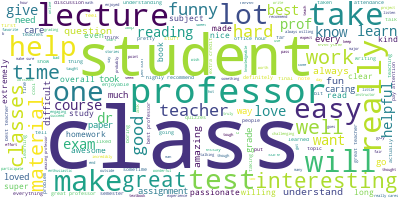

In [3]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data['review'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [4]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = data.review.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['inquiry', 'based', 'class', 'best', 'college', 'course', 'ever', 'taken', 'actually', 'learned', 'material', 'instead', 'spoon', 'fed', 'things', 'memorize', 'amazing', 'professor', 'really', 'cares', 'students', 'sense', 'humor', 'may', 'intimidate', 'really', 'nice', 'put', 'effort', 'fine']


In [5]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)]


In [6]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.027*"class" + 0.024*"professor" + 0.013*"really" + 0.011*"take" + '
  '0.009*"work" + 0.008*"one" + 0.008*"recommend" + 0.008*"get" + '
  '0.008*"funny" + 0.008*"lectures"'),
 (1,
  '0.041*"class" + 0.017*"easy" + 0.014*"take" + 0.011*"funny" + '
  '0.011*"really" + 0.011*"teacher" + 0.009*"great" + 0.008*"one" + '
  '0.007*"classes" + 0.007*"lectures"'),
 (2,
  '0.027*"class" + 0.024*"great" + 0.022*"professor" + 0.017*"students" + '
  '0.012*"really" + 0.011*"classes" + 0.010*"teacher" + 0.008*"best" + '
  '0.008*"lot" + 0.008*"amazing"'),
 (3,
  '0.023*"class" + 0.013*"professor" + 0.010*"students" + 0.010*"really" + '
  '0.008*"great" + 0.008*"take" + 0.007*"questions" + 0.006*"prof" + '
  '0.006*"easy" + 0.006*"lectures"'),
 (4,
  '0.027*"class" + 0.014*"really" + 0.013*"best" + 0.010*"one" + 0.008*"lot" + '
  '0.008*"ever" + 0.007*"tests" + 0.007*"always" + 0.007*"get" + '
  '0.007*"interesting"'),
 (5,
  '0.038*"class" + 0.018*"professor" + 0.014*"really" + 0.013*"take

In [17]:
#import os
#os.chdir('..')
# Read data into papers
import pandas as pd

# Define Data

data = pd.read_csv('r3_top.csv', encoding='unicode_escape' )
# Print head
data.head()

# Load the regular expression library
import re
# Remove punctuation
data['review']=data['review'].astype('str')
data['review'] = \
data['review'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
data['review'] = \
data['review'].map(lambda x: x.lower())
# Print out the first rows of papers
data['review'].head()



0    professor chaudhry puts material on tests that...
1    class lecture was okay but moved incredibly sl...
2    easy professor  as long as you do the assignme...
3    grade is based on 5 exams that he changes the ...
4    i have my best lecture experience in college s...
Name: review, dtype: object

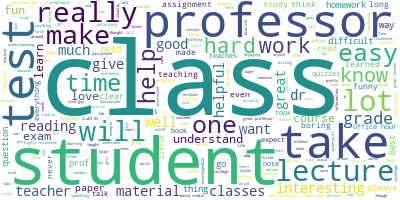

In [18]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data['review'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [19]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = data.review.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['professor', 'chaudhry', 'puts', 'material', 'tests', 'taught', 'class', 'whatsoever', 'go', 'little', 'detail', 'lectures', 'powerpoints', 'put', 'extremely', 'depth', 'material', 'test', 'wasnt', 'even', 'mentioned', 'us']


In [20]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]


In [21]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.038*"class" + 0.017*"take" + 0.016*"professor" + 0.014*"really" + '
  '0.013*"great" + 0.012*"students" + 0.011*"help" + 0.010*"easy" + '
  '0.008*"would" + 0.007*"interesting"'),
 (1,
  '0.039*"class" + 0.024*"professor" + 0.017*"great" + 0.013*"lot" + '
  '0.009*"time" + 0.008*"work" + 0.008*"material" + 0.008*"helpful" + '
  '0.008*"really" + 0.007*"extremely"'),
 (2,
  '0.026*"class" + 0.016*"professor" + 0.014*"easy" + 0.011*"great" + '
  '0.008*"helpful" + 0.007*"best" + 0.007*"get" + 0.007*"help" + 0.006*"dr" + '
  '0.006*"lot"'),
 (3,
  '0.037*"class" + 0.019*"students" + 0.012*"really" + 0.009*"learn" + '
  '0.009*"help" + 0.008*"much" + 0.008*"teacher" + 0.008*"one" + '
  '0.007*"professor" + 0.007*"work"'),
 (4,
  '0.048*"class" + 0.011*"hard" + 0.010*"tests" + 0.010*"nice" + 0.009*"take" '
  '+ 0.009*"great" + 0.009*"really" + 0.009*"professor" + 0.008*"teacher" + '
  '0.007*"easy"'),
 (5,
  '0.022*"class" + 0.012*"take" + 0.011*"professor" + 0.010*"one" + '
  '0.

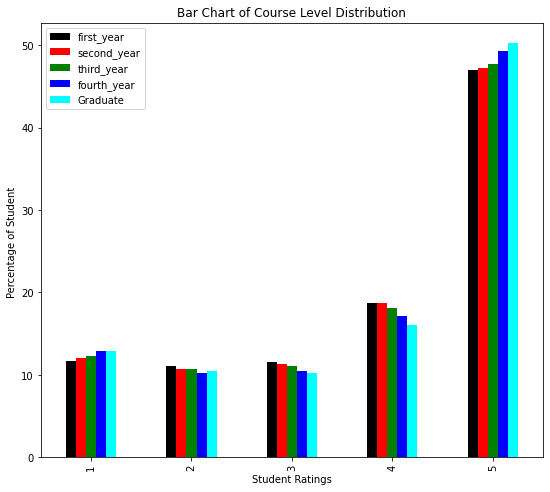

In [46]:
# Import Library

import matplotlib.pyplot as plt
import pandas as pd

# Define Data

data = pd.read_csv('course.csv')

# Multiple bar chart

data.plot(x="Score", y=["first_year","second_year","third_year","fourth_year","Graduate"], kind="bar",figsize=(9,8),color=['black', 'red', 'green', 'blue', 'cyan'])

# Display
plt.title('Bar Chart of Course Level Distribution')
plt.xlabel('Student Ratings')
plt.ylabel('Percentage of Student ')
plt.show()

In [48]:
import plotly.express as px
import pandas as pd

#df -> DataFrame made with pandas. columns in the data frame are Month, Count, Verdict
df = pd.read_csv('dts.csv')
fig = px.line(df, x="dates", y="counts", color='verdict')
fig.update_layout(
            title='Monthly Total Positive and Negative Reviews',
            xaxis_title = 'Months',
            yaxis_title = 'Total Monthly Reviews (Positive/Negative)',
            legend_title = 'Legends')

x_axes = ['2003-03','2003-12','2004-04','2004-12','2005-04','2005-12','2006-05', '2006-12','2007-05','2007-12','2008-05', '2008-12','2009-05', '2009-12',  '2010-05', '2010-12', '2011-05', '2011-12',
           '2012-05', '2012-12', '2013-05', '2013-12', '2014-05', '2014-12',
          '2015-05', '2015-12',  '2016-05', '2016-12', '2017-05', '2017-12',
           '2018-05', '2018-12','2019-05', '2019-12',  '2020-05', '2020-12'
          ,'2021-05','2021-12']

fig.update_xaxes(tickvals=x_axes, tickformat='%b %Y')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

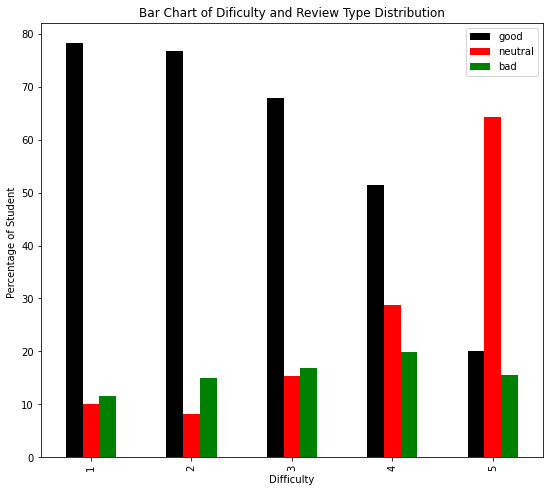

In [1]:
# Import Library

import matplotlib.pyplot as plt
import pandas as pd

# Define Data

data = pd.read_csv('diff_11.csv')

# Multiple bar chart

data.plot(x="difficulty", y=["good","neutral","bad"], kind="bar",figsize=(9,8),color=['black', 'red', 'green'])

# Display
plt.title('Bar Chart of Dificulty and Review Type Distribution')
plt.xlabel('Difficulty')
plt.ylabel('Percentage of Student ')
plt.show()

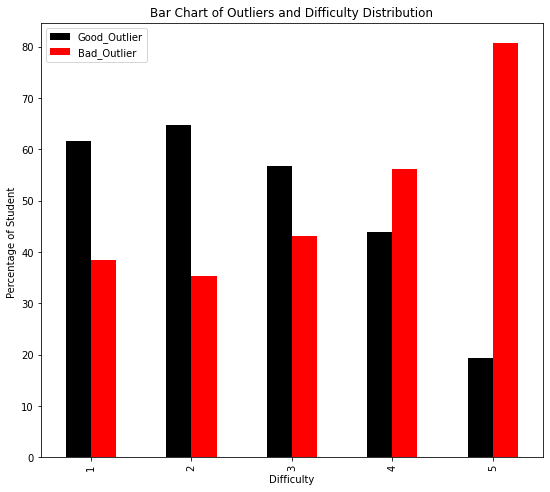

In [2]:
# Import Library

import matplotlib.pyplot as plt
import pandas as pd

# Define Data

data = pd.read_csv('outlier_11.csv')

# Multiple bar chart

data.plot(x="difficulty", y=["Good_Outlier","Bad_Outlier"], kind="bar",figsize=(9,8),color=['black', 'red'])

# Display
plt.title('Bar Chart of Outliers and Difficulty Distribution')
plt.xlabel('Difficulty')
plt.ylabel('Percentage of Student ')
plt.show()

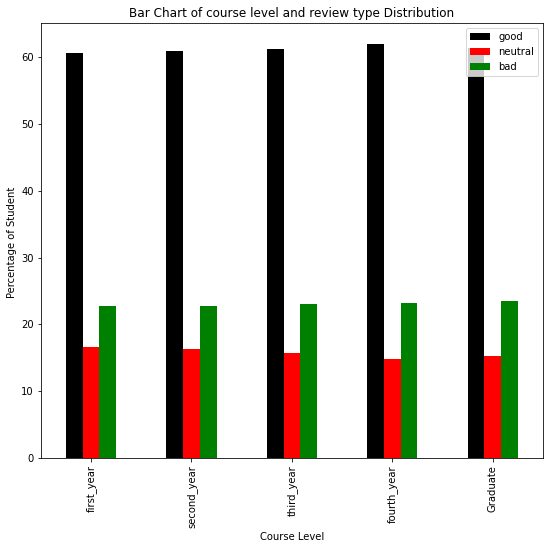

In [4]:
# Import Library

import matplotlib.pyplot as plt
import pandas as pd

# Define Data

data = pd.read_csv('course_11.csv')

# Multiple bar chart

data.plot(x="course_level", y=["good","neutral","bad"], kind="bar",figsize=(9,8),color=['black', 'red','green'])

# Display
plt.title('Bar Chart of course level and review type Distribution')
plt.xlabel('Course Level')
plt.ylabel('Percentage of Student ')
plt.show()